In [179]:
import numpy as np
import scipy.special
import numpy.random as random
import matplotlib.pyplot as plt

In [180]:
import sys
sys.path.append("../../")

In [181]:
from fractions import Fraction
from delay.matrix.Solver import *
from delay.matrix.Path import *
from delay.matrix.Matrix import *
import numpy as np
import pyperclip
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import string

In [190]:
class Generator:
    def __init__(self, tau):
        self.tau = tau
        self.prob = 2 ** (-tau)
        self.nOfPaths = 2 ** tau
        self.n = self.nOfPaths * (2 * tau + 2)
        self.aMatrix = np.zeros((self.n, self.n))

    def generateCols(tau):
        return list(range(-tau, tau+1, 2))

    def generateCombs(tau):
        return [scipy.special.comb(tau, x, exact=True) for x in range(tau+1)]

    def constructSystemOfEquations(self):
        combs = generateCombs(self.tau)
        cols = generateCols(self.tau)
        N = len(cols)
        assert len(cols) == len(combs)
        for state in range(1, 2*self.tau + 2):
            i = 0
            for c in range(N):
                for _ in range(combs[c]):
                    for col in range(self.nOfPaths):
                        if state+cols[c] >= 2*self.tau+2:
                            continue
                        try:
                            if cols[c] != self.tau:
                                theProb = self.prob 
                            else:
                                theProb = 1.0
                            if random.random() < 0.1/self.tau:
                                theProb = 0.0
                            # if cols[c] == self.tau:
                            #     print(state * self.nOfPaths + i, max(0, state+cols[c]) * self.nOfPaths + col)
                            self.aMatrix[state * self.nOfPaths + i, max(0, state+cols[c]) * self.nOfPaths + col] = theProb
                        except:
                            print(state, self.nOfPaths, i, cols[c], col)
                    i += 1

        # fill diagonal
        for i in range(self.nOfPaths):
            self.aMatrix[i, i] = 1
        for i in range(self.nOfPaths, self.n):
            self.aMatrix[i, i] -= 1.0

        return self.aMatrix
    
    def stationary(self):
        B = np.zeros(self.n)
        for i in range(self.nOfPaths):
            B[i] = (1 / 2) ** self.tau

        solution = np.linalg.solve(self.aMatrix, B)

        stationary = []
        for i in range(int(self.n / self.nOfPaths)):
            s = sum(solution[self.nOfPaths * i : self.nOfPaths * (i + 1)])
            stationary.append(s)
            
        return stationary
    

In [10]:
generateCols(4)

[-4, -2, 0, 2, 4]

In [58]:
generateCombs(1)

[1, 1]

In [89]:
generator = Generator(1)
aMatrix = generator.constructSystemOfEquations()
aMatrix

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5, -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0.5, -1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -1. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0.5, -1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ]])

In [90]:
generator.stationary()

[ 0.5   0.5   0.25  0.25  0.25  0.25  0.25 -0.  ]


[1.0, 0.5, 0.5, 0.25]

In [201]:
generator = Generator(5)
generator.constructSystemOfEquations()
s = generator.stationary()

solver = Solver(tau=5, d=10)
solver.stationary = s
solver.calculateMean()

-5.534633982613614

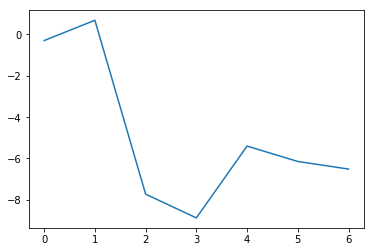

In [205]:
mus = []
for i in range(1, 8):
    generator = Generator(i)
    generator.constructSystemOfEquations()
    s = generator.stationary()
    
    solver = Solver(tau=i, d=10)
    solver.stationary = s
    mus.append(solver.calculateMean())
    
plt.plot(mus)